In [1]:
import pandas as pd

In [21]:
dt = pd.read_csv('https://raw.githubusercontent.com/paulosalvatore/Ocean_PythonPandas_10_08_20/master/dados-curso.csv')

In [3]:
dt

,data,texto,retweet,idioma,lugar,pais,sigla,latitude,longitude
0,2020-05-23 00:21:14,"Para voltar tudo ao normal, você precisa fazer...",0,pt,Rio das Ostras,Brazil,BR,-41.937900,-22.522600
1,2020-03-22 22:57:51,14.245 – O que é a hidroxicloroquina? https://...,0,pt,Sao Paulo,Brazil,BR,-46.674739,-23.606067
2,2020-04-14 00:11:33,Quarta morte em Lar de Estarreja associada à C...,1,pt,Lisbon,Portugal,PT,-9.099043,38.747518
3,2020-05-25 20:45:43,"COVID-19 | Hospital municipal Tide Setúbal, n...",0,pt,Sao Paulo,Brazil,BR,-46.633300,-23.550000
4,2020-04-15 10:34:39,#cenasdocotidiano #santos #distanciamentosocia...,0,pt,Santos,Brazil,BR,-46.293700,-23.975947
...,...,...,...,...,...,...,...,...,...
495,2020-04-07 16:14:13,O isolamento social também serve para mostrar ...,1,pt,Rio Branco,Brazil,BR,-67.859657,-9.932246
496,2020-03-26 18:02:28,Enquanto o mundo está atento ao covid 19 é o B...,0,pt,Rio de Janeiro,Brazil,BR,-43.358100,-22.942800
497,2020-03-18 05:28:16,"#covid_19 #stayhome @ Toronto, Ontario https:/...",0,pt,Toronto,Canada,CA,-79.387200,43.648000
498,2020-03-03 21:27:11,Um vira-lata sem Coronavirus #joeviralata #dog...,0,pt,Sao Paulo,Brazil,BR,-46.633300,-23.550000


In [5]:
!pip install geopandas

     |████████████████████████████████| 972kB 2.4MB/s 
     |████████████████████████████████| 10.9MB 12.9MB/s 
     |████████████████████████████████| 14.7MB 282kB/s 


In [13]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

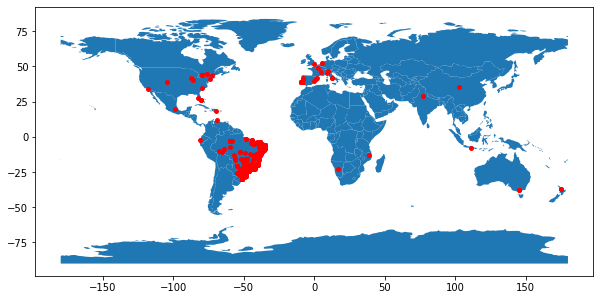

In [14]:
geometria = [Point(xy) for xy in zip(dt['latitude'], dt['longitude'])]

gdf = GeoDataFrame(dt, geometry=geometria)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15)

In [25]:
dt_brasil = dt[dt.sigla == "BR"]
dt_brasil

,data,texto,retweet,idioma,lugar,pais,sigla,latitude,longitude
0,2020-05-23 00:21:14,"Para voltar tudo ao normal, você precisa fazer...",0,pt,Rio das Ostras,Brazil,BR,-41.937900,-22.522600
1,2020-03-22 22:57:51,14.245 – O que é a hidroxicloroquina? https://...,0,pt,Sao Paulo,Brazil,BR,-46.674739,-23.606067
3,2020-05-25 20:45:43,"COVID-19 | Hospital municipal Tide Setúbal, n...",0,pt,Sao Paulo,Brazil,BR,-46.633300,-23.550000
4,2020-04-15 10:34:39,#cenasdocotidiano #santos #distanciamentosocia...,0,pt,Santos,Brazil,BR,-46.293700,-23.975947
7,2020-03-22 19:12:37,Memórias do cárcere. Hoje deu até pra treinar ...,0,pt,Rio de Janeiro,Brazil,BR,-43.273900,-22.961900
...,...,...,...,...,...,...,...,...,...
493,2020-04-08 23:40:59,A Lei 13.987/20 garante a distribuição dos ali...,0,pt,Medianeira,Brazil,BR,-54.104104,-25.297434
494,2020-04-14 12:06:38,"A 2ª Vara de Família e Sucessões de Jacareí, e...",0,pt,Sao Paulo,Brazil,BR,-46.638670,-23.540780
495,2020-04-07 16:14:13,O isolamento social também serve para mostrar ...,1,pt,Rio Branco,Brazil,BR,-67.859657,-9.932246
496,2020-03-26 18:02:28,Enquanto o mundo está atento ao covid 19 é o B...,0,pt,Rio de Janeiro,Brazil,BR,-43.358100,-22.942800


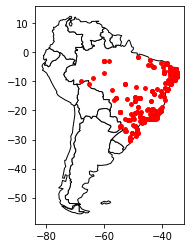

In [28]:
ax = world[world.continent == 'South America'].plot(color='white', edgecolor='black')
geometria = [Point(xy) for xy in zip(dt_brasil['latitude'], dt_brasil['longitude'])]

gdf = GeoDataFrame(dt_brasil, geometry=geometria)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=ax, marker='o', color='red', markersize=15)